In [1]:
# first we will import all the important libreary which we will be using in our model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# lets import the data set which i had downloaded from kaggel as walmart_sales
a=pd.read_csv(r"C:\Users\arpitshrivastav.vc\Downloads\Walmart_sales.csv")
a

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [48]:
a.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [3]:
# now lets try to understand the numeric columns of our data set
a.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [4]:
# lets check for the null values in our data set
a.isnull().sum() # as we can see there is no null values present in our data set

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

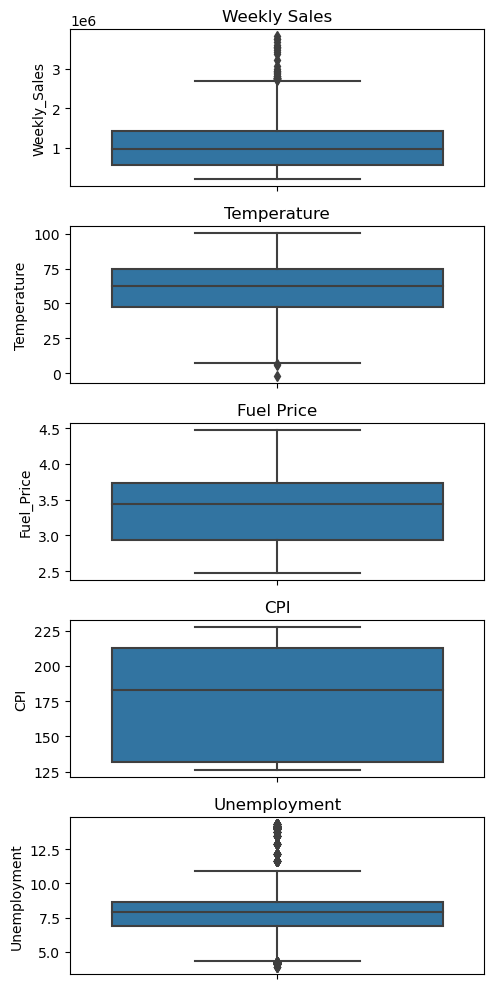

In [15]:
# now lets check for the outliers using boxplot

# Create subplots
fig, axes = plt.subplots(5, 1, figsize=(5, 10))

# Plot each boxplot
sns.boxplot(y=a["Weekly_Sales"], ax=axes[0])
axes[0].set_title("Weekly Sales")

sns.boxplot(y=a["Temperature"], ax=axes[1])
axes[1].set_title("Temperature")

sns.boxplot(y=a["Fuel_Price"], ax=axes[2])
axes[2].set_title("Fuel Price")

sns.boxplot(y=a["CPI"], ax=axes[3])
axes[3].set_title("CPI")

sns.boxplot(y=a["Unemployment"], ax=axes[4])
axes[4].set_title("Unemployment")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# as we can see "weekly_sales" and "unemployment" column has some outliers

2720371.4924999997


<Axes: ylabel='Weekly_Sales'>

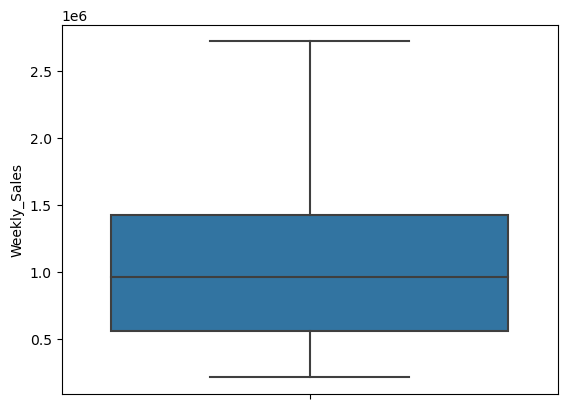

In [17]:
# first we will remove weekly sales outliers
Q1,Q3=a["Weekly_Sales"].quantile([.25,.75])
IQR=Q3-Q1
LL=Q1-1.5*(IQR) # LowerLimit
UL=Q3+1.5*(IQR) # upperLimit

print(UL) 

# now we will replace the outliers with the upper limit

a["Weekly_Sales"]=np.where(a["Weekly_Sales"]>UL,UL,a["Weekly_Sales"])
# here we had Replace  the outliers with the UL

# now lets print the Box plot to check
sns.boxplot(y=a["Weekly_Sales"])
# as we can see all the outliers are removed

11.218499999999999


<Axes: ylabel='Unemployment'>

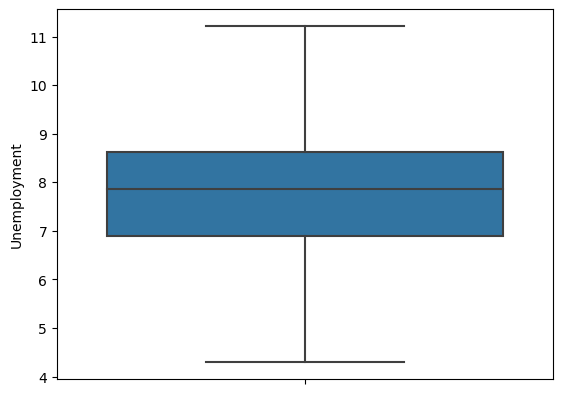

In [19]:
# first we will remove Unemployment outliers
Q1,Q3=a["Unemployment"].quantile([.25,.75])
IQR=Q3-Q1
LL=Q1-1.5*(IQR) # LowerLimit
UL=Q3+1.5*(IQR) # upperLimit

print(UL) 

# now we will replace the outliers with the upper limit

a["Unemployment"]=np.where(a["Unemployment"]>UL,UL,a["Unemployment"])
a["Unemployment"]=np.where(a["Unemployment"]<LL,LL,a["Unemployment"])
# here we had Replace  the outliers with the UL

# now lets print the Box plot to check
sns.boxplot(y=a["Unemployment"])
# as we can see all the outliers are removed

In [20]:
# Now lets see our data frame
a.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.045029e+06,0.069930,60.663782,3.358607,171.578394,7.871208
std,12.988182,5.572961e+05,0.255049,18.444933,0.459020,39.356712,1.520694
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,4.294500
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2.720371e+06,1.000000,100.140000,4.468000,227.232807,11.218500


In [21]:
a.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

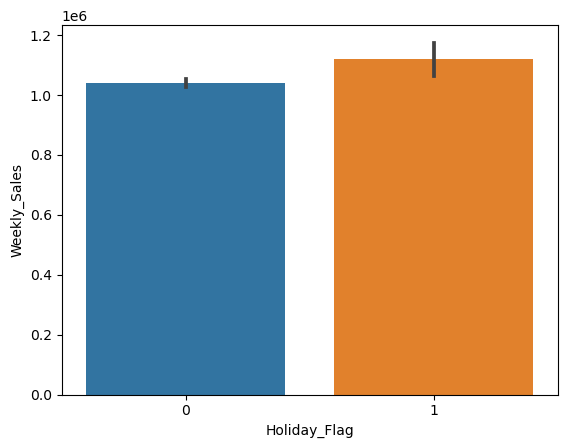

In [22]:
# lets see the sales on normal days and holiday
sns.barplot(x=a["Holiday_Flag"],y=a["Weekly_Sales"])

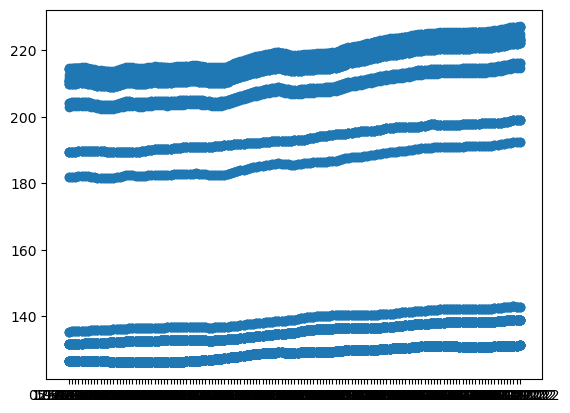

In [26]:
plt.scatter(a["Date"],a["CPI"])
# as we can see the CPI is increasing as per the date

In [27]:
a.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [51]:
# Now lets build our model and split our data into X and Y
x=a[["Store","CPI","Holiday_Flag","Temperature","Fuel_Price","Unemployment"]]
y=a[["Weekly_Sales"]]


In [52]:
print(x.shape)
print(y.shape)

(6435, 6)
(6435, 1)


In [53]:
# Now lets split our data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(y_train.shape)

# lets import our model
from sklearn.linear_model import LinearRegression # now i am importing the linear regression model
clf = LinearRegression() # clf is classifier

# now we will fit the data in our model to train the model
clf.fit(x_train,y_train)

(5148, 6)
(5148, 1)


LinearRegression()

In [54]:
# now lets predict the values 
clf.predict(x_test)

array([[ 839587.14887278],
       [ 692523.3793513 ],
       [ 629255.94128834],
       ...,
       [1238946.55339503],
       [ 943222.0492691 ],
       [ 987993.70829893]])

In [56]:
clf.score(x_test,y_test)

0.15432100590293518